<a href="https://colab.research.google.com/github/IvanUlloa098/simulacion/blob/main/tarea_6/Ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio1 - Pruebas de Validación de NúmerosPseudo-Aleatorios
## Iván Ulloa

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
from google.colab import files
import plotly.express as px
from matplotlib.pyplot import figure
from matplotlib.ticker import ScalarFormatter

In [3]:
file_upload = files.upload()

Saving forestfires.csv to forestfires.csv


In [4]:
forest_fires = pd.read_csv(io.StringIO(file_upload['forestfires.csv'].decode('utf-8')))
forest_fires.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
print(f'La covarianza entre la variable wind (viento) y RH (humedad relativa) es: {forest_fires.wind.cov(forest_fires.RH)}')

La covarianza entre la variable wind (viento) y RH (humedad relativa) es: 2.0292197082152543


In [16]:
x = np.array(forest_fires['wind'])
y = np.array(forest_fires['RH'])

def covariance(x, y):
    N = len(x)
    
    media_x = sum(x)/len(x)
    media_y = sum(y)/len(y)
    
    sum_x = [i - media_x for i in x]
    sum_y = [i - media_y for i in y]

    sumatoria = sum([sum_x[i]*sum_y[i] for i in range(len(sum_x))])

    cov = sumatoria/(N-1)
    return cov

cov = covariance(x, y)
print(f'La covarianza entre la variable wind (viento) y RH (humedad relativa) es: {cov}')

La covarianza entre la variable wind (viento) y RH (humedad relativa) es: 2.0292197082152548


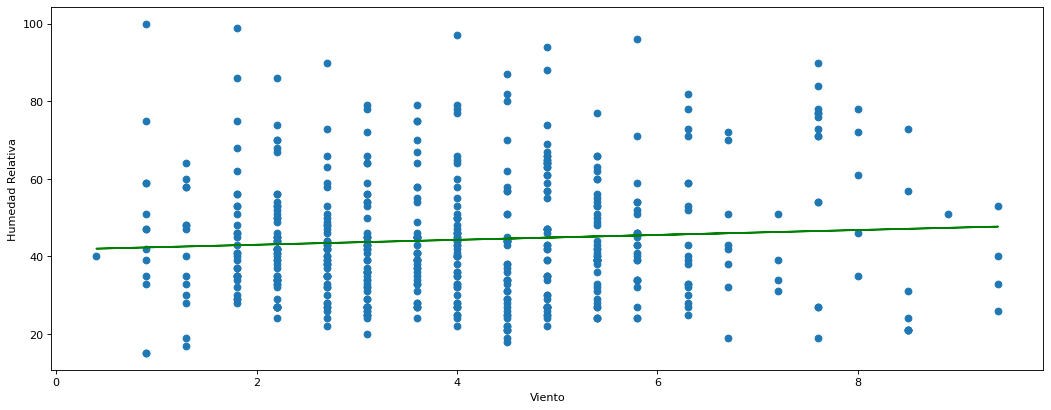

In [17]:
figure(figsize=(16, 6), dpi=80)

plt.xlabel("Viento")
plt.ylabel("Humedad Relativa")
plt.scatter(x, y)

# Graficamos una regresión lineal
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='green')

plt.show()

**Conclusión**
- La covarianza entre estas dos variables es muy baja por lo que no existe información que relacione la velocidad del viento con la humedad relativa. En la gráfica podemos ver que existen varios valores para "wind" que se encuentran en varios valores de "RH. Por ejemplo, si una de estas variables reduce su valor la otra no lo hace en un patrón determinado.